# <font color=red>Assignment</font>

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

c:\Users\Zen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Clustered Data:
     city  year  weekofyear  total_cases
0      sj  1990          18            4
1      sj  1990          19            5
2      sj  1990          20            4
3      sj  1990          21            3
4      sj  1990          22            6
...   ...   ...         ...          ...
1451   iq  2010          21            5
1452   iq  2010          22            8
1453   iq  2010          23            1
1454   iq  2010          24            1
1455   iq  2010          25            4

[1456 rows x 4 columns]
Shape of numeric_data_pca: (1456, 1)
Unique Labels: [0 1]
NaN values in numeric_data: 0
Data Types of numeric_data: total_cases    int64
dtype: object


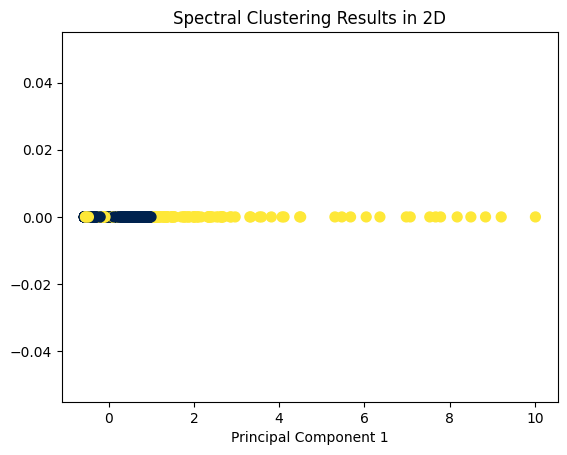

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = pd.read_csv('dengue_labels_train.csv')

# Drop unnecessary columns for clustering
numeric_data = data.drop(['city', 'year', 'weekofyear'], axis=1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Standardize the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=min(2, numeric_data_scaled.shape[1]))
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Perform spectral clustering
n_clusters = 2  
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = labels

# Display the cluster assignments
print("Clustered Data:")
print(data[['city', 'year', 'weekofyear', 'total_cases']])

# Print additional information for diagnosis
print("Shape of numeric_data_pca:", numeric_data_pca.shape)
print("Unique Labels:", np.unique(labels))
print("NaN values in numeric_data:", numeric_data.isna().sum().sum())
print("Data Types of numeric_data:", numeric_data.dtypes)

# Visualize the clustering results with PCA using only the first component
plt.scatter(numeric_data_pca[:, 0], np.zeros_like(numeric_data_pca[:, 0]), c=labels, s=50, cmap='cividis')
plt.title('Spectral Clustering Results in 2D')
plt.xlabel('Principal Component 1')
plt.show()


# <font color=red>Eigenvector Centrality Assignment 1</font>

Given the following graph below, find it eigenvector centrality:

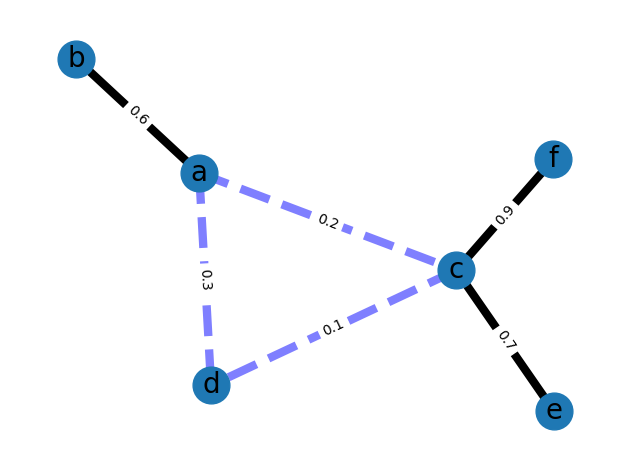

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

<font color=green>**Solution:**</font>

In [4]:
nx.eigenvector_centrality(G)

{'a': 0.51807347662071,
 'b': 0.21182192277183212,
 'c': 0.5986761070959697,
 'd': 0.4566010978754134,
 'e': 0.24477918831750853,
 'f': 0.24477918831750853}

# <font color=red>Assignment 2</font>

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

Name of Chosen Data: Russian and Ukrainian Equipment Losses Data

Scope of Collected Data:

Subreddit: AskReddit
Title: Ask Reddit...
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='ShoddySubstance'), Redditor(name='NaziGazpacho'), Redditor(name='Quinthyll'), Redditor(name='HillarysDoubleChin'), Redditor(name='Fushigibama')]


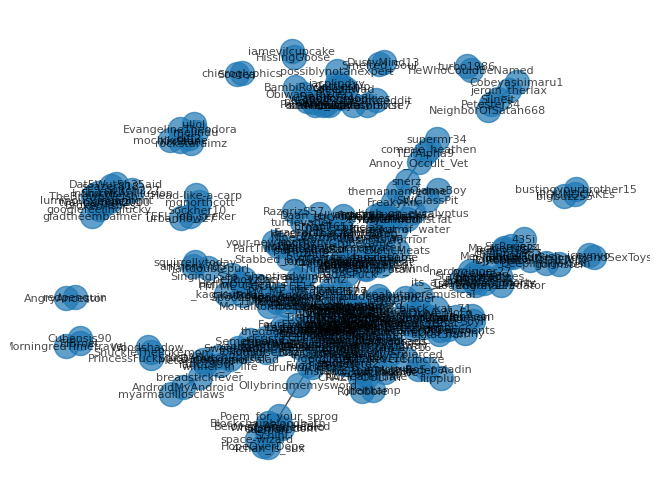

In [21]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

reddit = praw.Reddit(client_id='s_2K_r9RHwzqSRXp-RS3dg',
                        client_secret='hUn5ZH6ddg3n6A4EK2Ie1QKeEIlFDw',
                        user_agent='Zenolitee')

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "AskReddit"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)